# Лабораториска Вежба 3
# Ненадгледувано Учење
Мартин Поповски 186086

## Imports

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import homogeneity_score
from sklearn.mixture import GaussianMixture

## Load dataset

In [2]:
df = pd.read_csv('Data/Data_Cortex_Nuclear.csv')
df

,MouseID,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,...,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N,Genotype,Treatment,Behavior,class
0,309_1,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,...,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652,Control,Memantine,C/S,c-CS-m
1,309_2,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,...,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610,Control,Memantine,C/S,c-CS-m
2,309_3,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,...,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427,Control,Memantine,C/S,c-CS-m
3,309_4,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,...,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563,Control,Memantine,C/S,c-CS-m
4,309_5,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,...,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730,Control,Memantine,C/S,c-CS-m
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,J3295_11,0.254860,0.463591,0.254860,2.092082,2.600035,0.211736,0.171262,2.483740,0.207317,...,0.183324,0.374088,0.318782,0.204660,0.328327,1.364823,Ts65Dn,Saline,S/C,t-SC-s
1076,J3295_12,0.272198,0.474163,0.251638,2.161390,2.801492,0.251274,0.182496,2.512737,0.216339,...,0.175674,0.375259,0.325639,0.200415,0.293435,1.364478,Ts65Dn,Saline,S/C,t-SC-s
1077,J3295_13,0.228700,0.395179,0.234118,1.733184,2.220852,0.220665,0.161435,1.989723,0.185164,...,0.158296,0.422121,0.321306,0.229193,0.355213,1.430825,Ts65Dn,Saline,S/C,t-SC-s
1078,J3295_14,0.221242,0.412894,0.243974,1.876347,2.384088,0.208897,0.173623,2.086028,0.192044,...,0.196296,0.397676,0.335936,0.251317,0.365353,1.404031,Ts65Dn,Saline,S/C,t-SC-s


In [3]:
X = df.iloc[:, 1:-4].copy()
X

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
0,0.503644,0.747193,0.430175,2.816329,5.990152,0.218830,0.177565,2.373744,0.232224,1.750936,...,0.188852,0.122652,NaN,0.106305,0.108336,0.427099,0.114783,0.131790,0.128186,1.675652
1,0.514617,0.689064,0.411770,2.789514,5.685038,0.211636,0.172817,2.292150,0.226972,1.596377,...,0.200404,0.116682,NaN,0.106592,0.104315,0.441581,0.111974,0.135103,0.131119,1.743610
2,0.509183,0.730247,0.418309,2.687201,5.622059,0.209011,0.175722,2.283337,0.230247,1.561316,...,0.193685,0.118508,NaN,0.108303,0.106219,0.435777,0.111883,0.133362,0.127431,1.926427
3,0.442107,0.617076,0.358626,2.466947,4.979503,0.222886,0.176463,2.152301,0.207004,1.595086,...,0.192112,0.132781,NaN,0.103184,0.111262,0.391691,0.130405,0.147444,0.146901,1.700563
4,0.434940,0.617430,0.358802,2.365785,4.718679,0.213106,0.173627,2.134014,0.192158,1.504230,...,0.205604,0.129954,NaN,0.104784,0.110694,0.434154,0.118481,0.140314,0.148380,1.839730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1075,0.254860,0.463591,0.254860,2.092082,2.600035,0.211736,0.171262,2.483740,0.207317,1.057971,...,0.275547,0.190483,NaN,0.115806,0.183324,0.374088,0.318782,0.204660,0.328327,1.364823
1076,0.272198,0.474163,0.251638,2.161390,2.801492,0.251274,0.182496,2.512737,0.216339,1.081150,...,0.283207,0.190463,NaN,0.113614,0.175674,0.375259,0.325639,0.200415,0.293435,1.364478
1077,0.228700,0.395179,0.234118,1.733184,2.220852,0.220665,0.161435,1.989723,0.185164,0.884342,...,0.290843,0.216682,NaN,0.118948,0.158296,0.422121,0.321306,0.229193,0.355213,1.430825
1078,0.221242,0.412894,0.243974,1.876347,2.384088,0.208897,0.173623,2.086028,0.192044,0.922595,...,0.306701,0.222263,NaN,0.125295,0.196296,0.397676,0.335936,0.251317,0.365353,1.404031


In [4]:
y = df['class']
y

0       c-CS-m
1       c-CS-m
2       c-CS-m
3       c-CS-m
4       c-CS-m
         ...  
1075    t-SC-s
1076    t-SC-s
1077    t-SC-s
1078    t-SC-s
1079    t-SC-s
Name: class, Length: 1080, dtype: object

## Clean data

Handling missing values

In [5]:
len(X)

1080

In [6]:
X.isna().sum()

DYRK1A_N       3
ITSN1_N        3
BDNF_N         3
NR1_N          3
NR2A_N         3
            ... 
SYP_N          0
H3AcK18_N    180
EGR1_N       210
H3MeK4_N     270
CaNA_N         0
Length: 77, dtype: int64

In [7]:
X_clean = X.dropna()

In [8]:
y_clean = y[X_clean.index]

In [9]:
X_clean.isna().sum()

DYRK1A_N     0
ITSN1_N      0
BDNF_N       0
NR1_N        0
NR2A_N       0
            ..
SYP_N        0
H3AcK18_N    0
EGR1_N       0
H3MeK4_N     0
CaNA_N       0
Length: 77, dtype: int64

In [10]:
len(X_clean)

552

In [11]:
len(y_clean)

552

We lost half of the rows by dropping all NA values

## Scale data

In [12]:
scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X_clean), columns=X_clean.columns)
X_scaled

,DYRK1A_N,ITSN1_N,BDNF_N,NR1_N,NR2A_N,pAKT_N,pBRAF_N,pCAMKII_N,pCREB_N,pELK_N,...,SHH_N,BAD_N,BCL2_N,pS6_N,pCFOS_N,SYP_N,H3AcK18_N,EGR1_N,H3MeK4_N,CaNA_N
0,1.436707,1.126128,1.705383,1.703232,1.499958,-0.450542,0.047550,0.077228,0.862572,0.761816,...,0.415723,-0.575896,-0.681628,0.837643,-0.022167,0.591953,-0.598618,-0.883796,-1.109349,0.764351
1,1.232724,1.198861,1.381104,1.543155,1.528343,-0.028033,-0.303284,0.019442,0.354457,0.502343,...,0.743454,-0.777233,-0.311244,1.331291,0.653422,0.324221,-0.804406,-0.484846,-1.060919,0.564395
2,1.361014,1.258610,1.605906,1.830294,1.698169,-0.408545,-0.085447,0.139804,0.389816,0.954070,...,0.705498,-0.450800,0.058025,1.035111,0.879360,0.249394,-0.744553,-0.499891,-1.123373,0.594418
3,0.989748,0.724574,0.625917,0.896770,1.022459,-0.483850,-0.560389,0.113739,-0.393751,0.349682,...,0.185162,-0.782991,-0.920783,-0.079539,-0.419656,0.482464,-0.972203,-0.957253,-1.149702,0.824032
4,0.779828,0.738418,0.657906,0.922900,1.031234,-0.363433,-0.384122,0.181366,-0.389730,0.416548,...,0.582337,-0.793646,-0.684829,0.600539,0.630430,-0.089468,-0.841942,-0.637644,-1.045776,0.704288
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
547,-0.202681,-0.149662,1.578501,0.632074,0.916205,2.424403,1.487662,1.880432,0.677624,0.324182,...,0.625996,1.166339,0.188407,0.879247,-0.369502,0.874097,0.192044,0.604766,0.616050,-0.728000
548,-0.167167,-0.200511,2.189391,0.630625,1.080536,2.400818,1.836960,1.944235,0.856766,0.577405,...,1.197808,1.333069,1.061170,0.898796,-0.423291,0.669417,0.274484,0.814374,0.906920,-0.840644
549,-0.438229,-0.331772,0.867974,0.320165,0.178897,2.745259,1.975053,1.765066,1.298752,0.656010,...,0.167148,1.341388,0.735288,0.682069,-0.387835,0.638911,0.136530,0.115200,1.093607,-0.841452
550,-0.420474,-0.392466,1.414312,0.407647,0.489850,3.094822,2.117460,1.738436,0.901369,0.780909,...,0.123207,2.079748,1.126816,0.052025,0.348933,0.807648,0.319626,0.593259,1.668577,-0.742861


## Visualizations

### PCA

In [13]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
X_pca

array([[ 6.2682903 , -3.48579712],
       [ 5.8254835 , -2.97455077],
       [ 6.87728833, -3.02751443],
       ...,
       [ 6.35244088,  4.41514934],
       [ 7.5705626 ,  5.22644708],
       [ 8.22955899,  5.51307806]])

<AxesSubplot:>

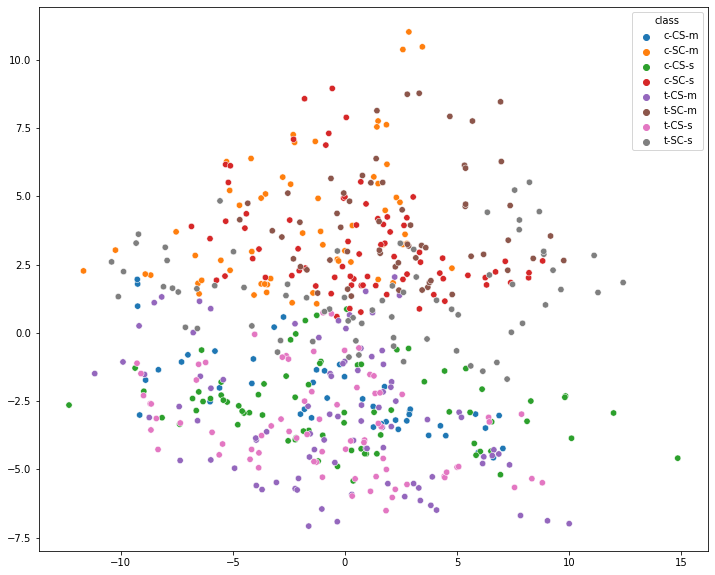

In [14]:
fig, ax = plt.subplots(figsize=(12, 10))
sns.scatterplot(
    x=[item[0] for item in X_pca],
    y=[item[1] for item in X_pca],
    hue=y_clean,
    s=40,
    ax=ax
)

## Helper functions

In [15]:
def summary(X, y, y_pred, silent=False):
    tsne = TSNE(n_components=2, random_state=0)
    X_tsne = tsne.fit_transform(X)
    score = homogeneity_score(y, y_pred)
    if not silent:
        print(f'Homogeneity score: {score}')
        fig, axs = plt.subplots(2, figsize=(12, 20))
        sns.scatterplot(
            x=[item[0] for item in X_tsne],
            y=[item[1] for item in X_tsne],
            hue=y,
            palette='tab10',
            ax=axs[0]
        ).set_title('Original')
        sns.scatterplot(
            x=[item[0] for item in X_tsne],
            y=[item[1] for item in X_tsne],
            hue=y_pred,
            palette='tab10',
            ax=axs[1]
        ).set_title('Predicted')
    return score

In [16]:
df_scores = pd.DataFrame()

## KMeans

In [17]:
num_classes = len(y.unique())
num_classes

8

Homogeneity score: 0.3561327788994921


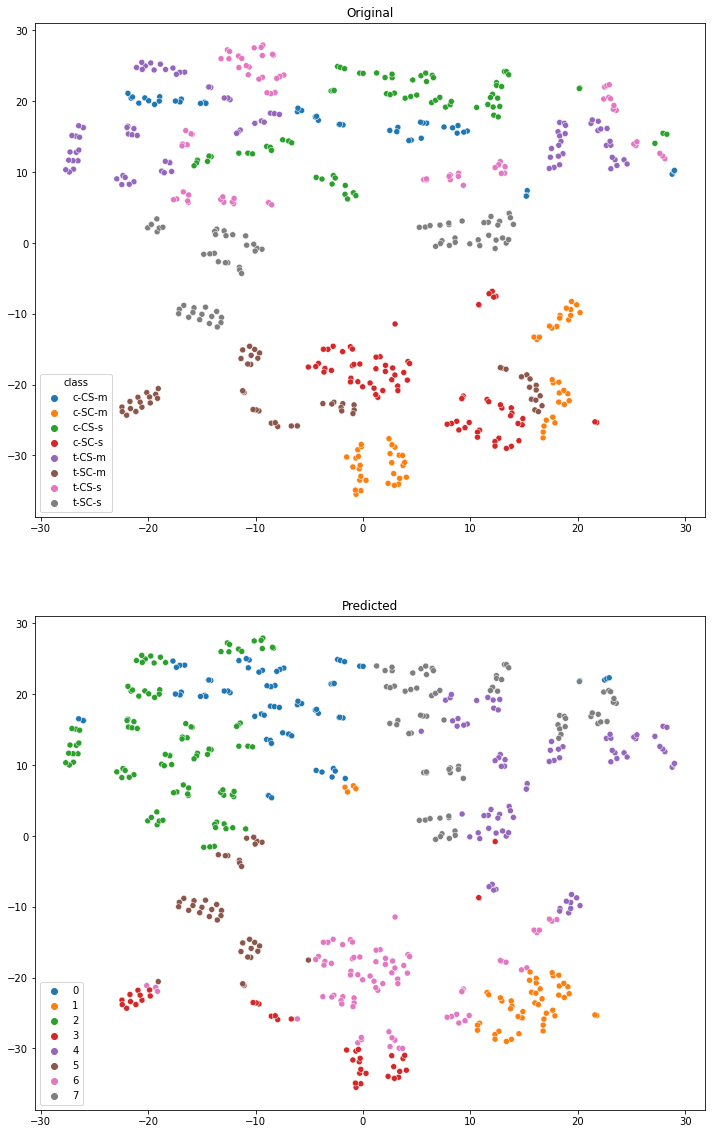

In [18]:
model = KMeans(n_clusters=num_classes, random_state=0)
model.fit(X_scaled)
y_pred = model.predict(X_scaled)
score = summary(X_scaled, y_clean, y_pred)
df_scores = df_scores.append({'Model': 'KMeans', 'Score': score}, ignore_index=True)

## GaussianMixture

Homogeneity score: 0.3191823056935833


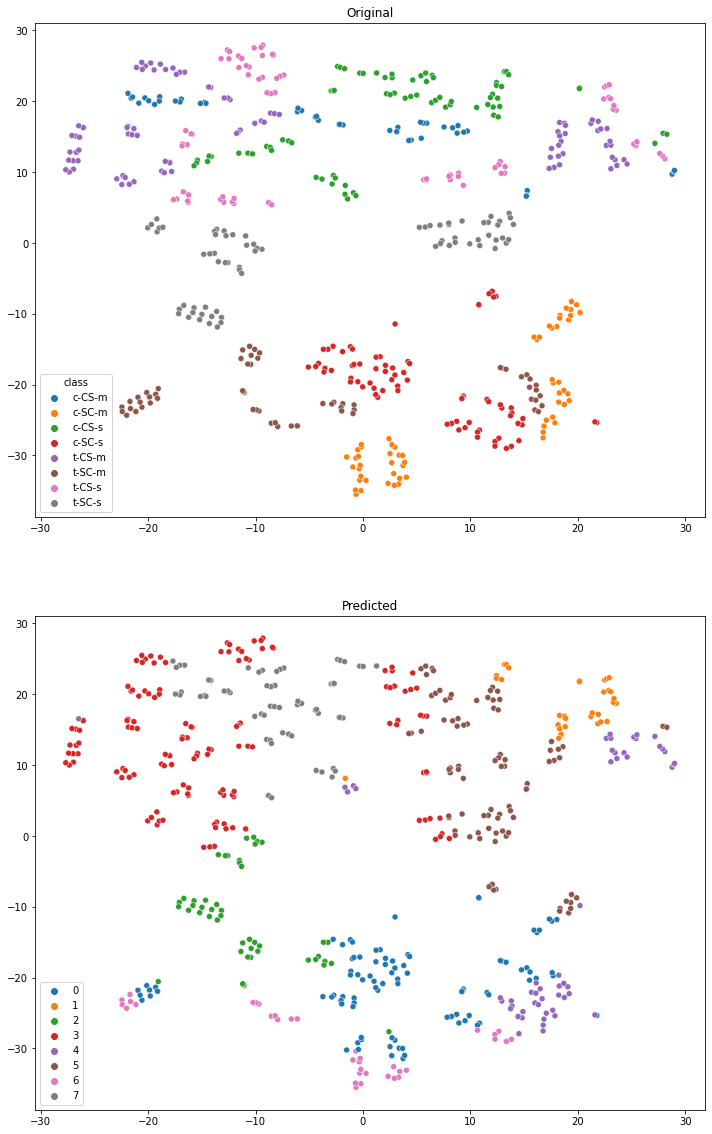

In [19]:
model = GaussianMixture(n_components=num_classes, random_state=0)
model.fit(X_scaled)
y_pred = model.predict(X_scaled)
score = summary(X_scaled, y_clean, y_pred)
df_scores = df_scores.append({'Model': 'GaussianMixture', 'Score': score}, ignore_index=True)

## AgglomerativeClustering

Homogeneity score: 0.3403978075683484


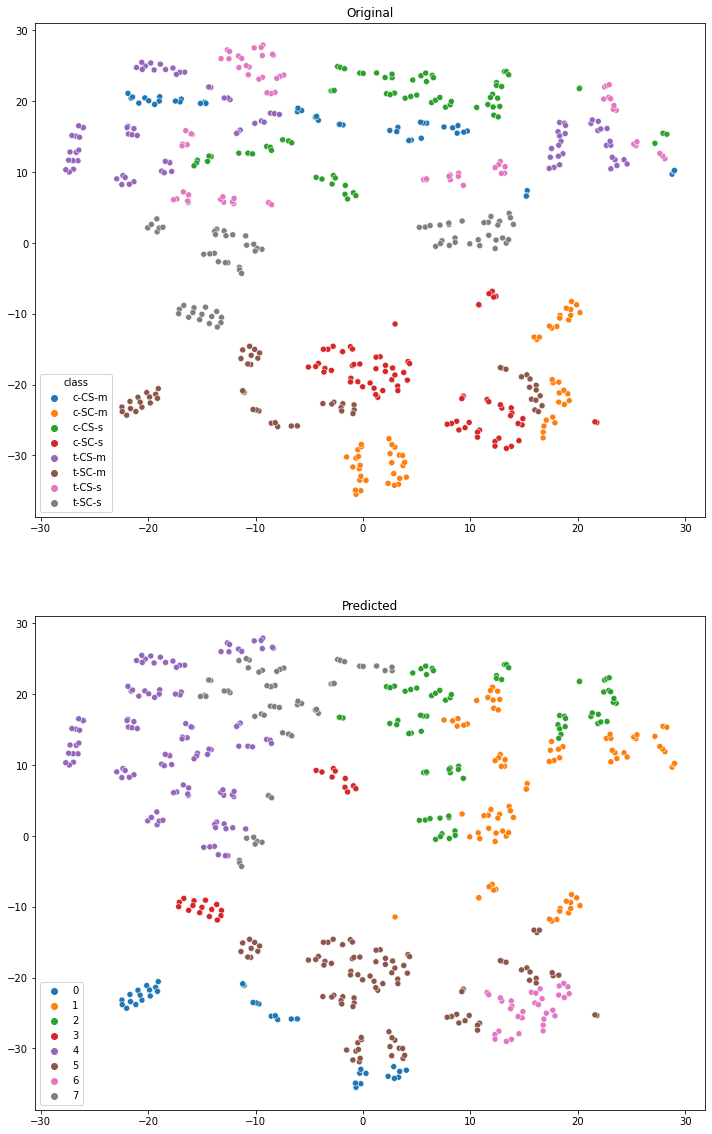

In [20]:
model = AgglomerativeClustering(n_clusters=num_classes)
model.fit(X_scaled)
y_pred = model.labels_
score = summary(X_scaled, y_clean, y_pred)
df_scores = df_scores.append({'Model': 'AgglomerativeClustering', 'Score': score}, ignore_index=True)

## DBSCAN

### Trying different eps

<AxesSubplot:>

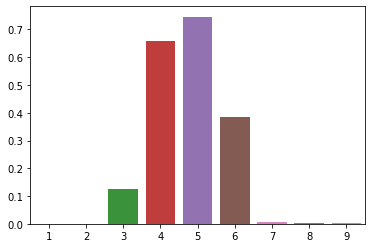

In [21]:
scores = []
for eps in range(1, 10):
    model = DBSCAN(eps=eps)
    model.fit(X_scaled)
    y_pred = model.labels_
    scores.append(summary(X_scaled, y_clean, y_pred, silent=True))
sns.barplot(x=list(range(1, 10)), y=scores)

### Trying different min_samples

<AxesSubplot:>

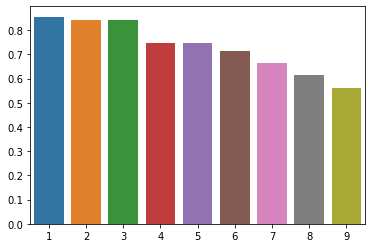

In [22]:
scores = []
for min_samples in range(1, 10):
    model = DBSCAN(eps=5, min_samples=min_samples)
    model.fit(X_scaled)
    y_pred = model.labels_
    scores.append(summary(X_scaled, y_clean, y_pred, silent=True))
sns.barplot(x=list(range(1, 10)), y=scores)

### Best model

Homogeneity score: 0.8559321635146249


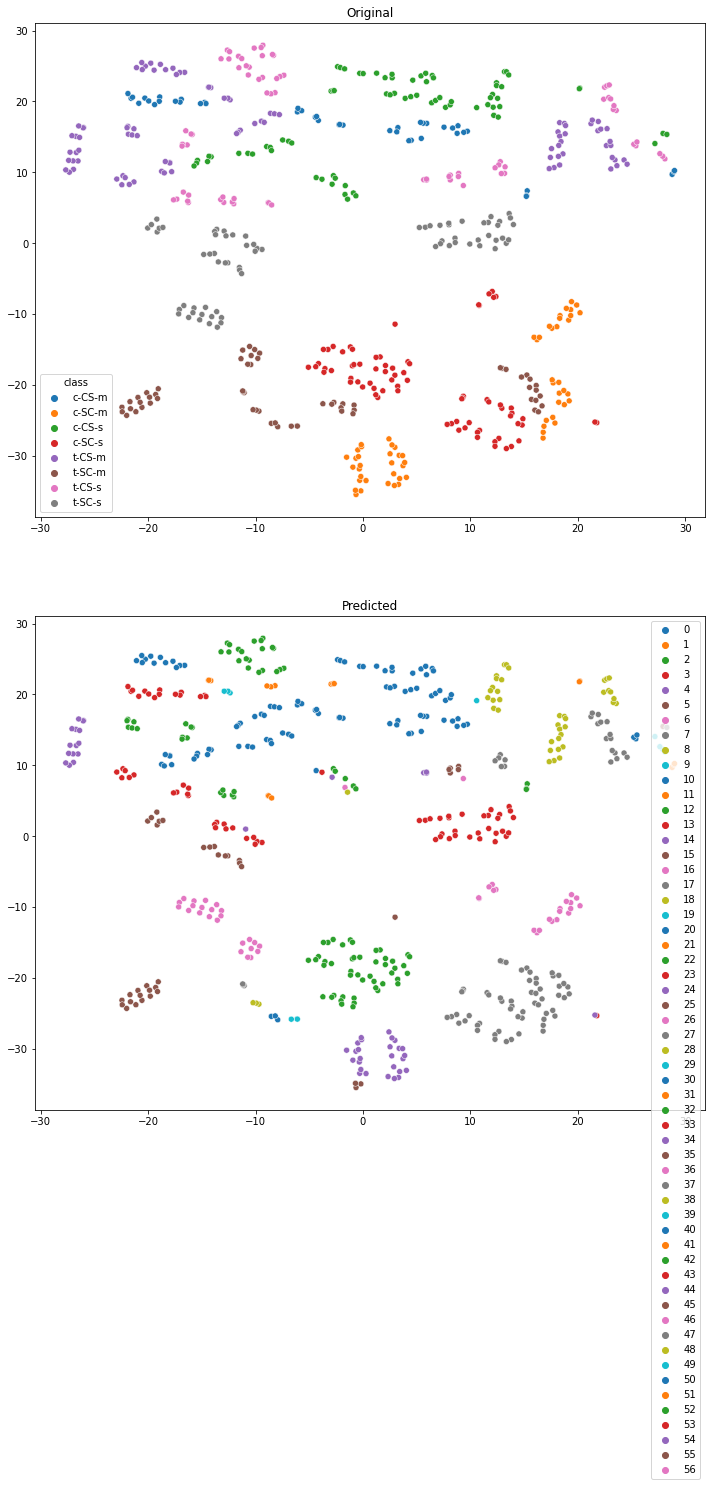

In [23]:
model = DBSCAN(eps=5, min_samples=1)
model.fit(X_scaled)
y_pred = model.labels_
score = summary(X_scaled, y_clean, y_pred)
df_scores = df_scores = df_scores.append({'Model': 'DBSCAN', 'Score': score}, ignore_index=True)

## Conclusion

<AxesSubplot:xlabel='Model', ylabel='Score'>

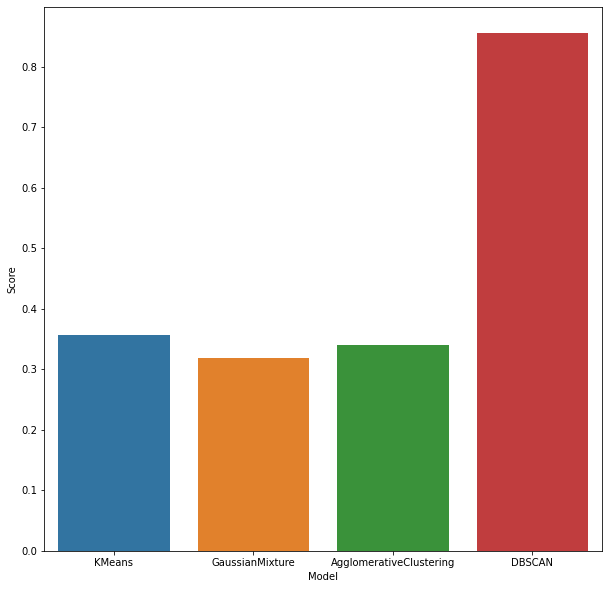

In [30]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.barplot(x='Model', y='Score', data=df_scores, ax=ax)

t-SNE seems to give better visualizations for this data set compared to PCA.  
DBSCAN with selected parameters had the best homogeneity score for this data set.